In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import random
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot

In [2]:
df = pd.read_csv('dataset/Seattle_Hotels.csv', encoding="latin-1")
df.head()

,name,address,desc
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the..."
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat..."
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ..."
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...
4,The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...


In [3]:
def print_description(index):
    example = df[df.index == index][['desc', 'name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Name:', example[1])

<AxesSubplot:xlabel='desc'>

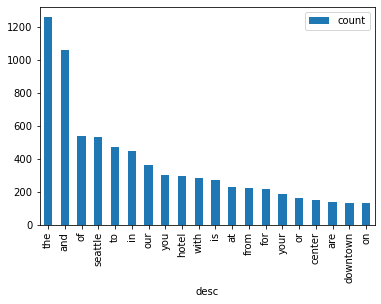

In [4]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['desc'], 20)
df1 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df1.plot(x ='desc', y='count', kind = 'bar')

<AxesSubplot:xlabel='desc'>

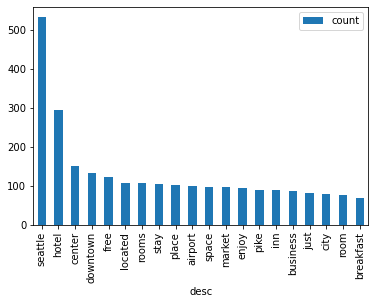

In [5]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['desc'], 20)
df2 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df2.plot(x ='desc', y='count', kind = 'bar')

<AxesSubplot:xlabel='desc'>

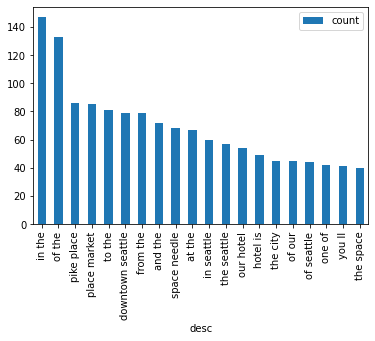

In [6]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['desc'], 20)
df3 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df3.plot(x ='desc', y='count', kind = 'bar')

<AxesSubplot:xlabel='desc'>

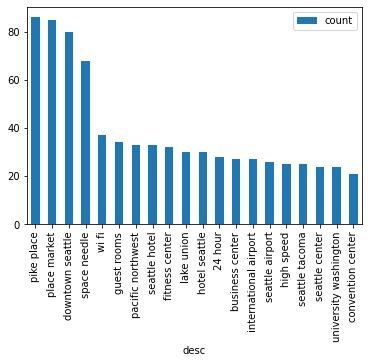

In [7]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['desc'], 20)
df4 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df4.plot(x ='desc', y='count', kind = 'bar')

<AxesSubplot:xlabel='desc'>

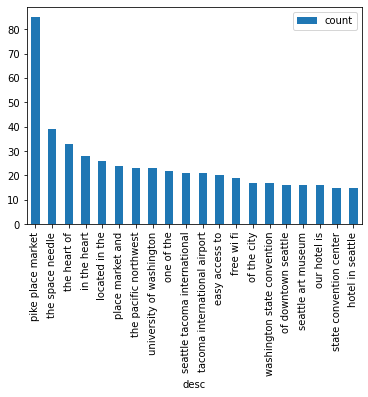

In [8]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['desc'], 20)
df5 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df5.plot(x ='desc', y='count', kind = 'bar')

<AxesSubplot:xlabel='desc'>

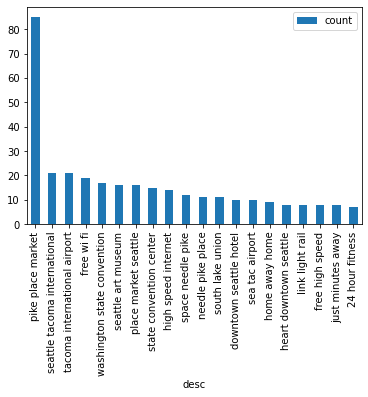

In [9]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['desc'], 20)
df6 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df6.plot(x ='desc', y='count', kind = 'bar')

In [10]:
df['word_count'] = df['desc'].apply(lambda x: len(str(x).split()))
desc_lengths = list(df['word_count'])
print("Number of descriptions:",len(desc_lengths),
      "\nAverage word count", np.average(desc_lengths),
      "\nMinimum word count", min(desc_lengths),
      "\nMaximum word count", max(desc_lengths))

Number of descriptions: 152 
Average word count 156.94736842105263 
Minimum word count 16 
Maximum word count 494


In [11]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text    
df['desc_clean'] = df['desc'].apply(clean_text)

In [12]:
def print_description(index):
    example = df[df.index == index][['desc_clean', 'name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Name:', example[1])
print_description(10)

soak vibrant scene living room bar get mix live music dj series heading memorable dinner trace offering inspired seasonal fare awardwinning atmosphere nottobemissed culinary experience downtown seattle work next morning fit stateoftheart fitness center wandering explore many areas nearby attractions including pike place market pioneer square seattle art museum always weve got covered time w seattle signature whatever whenever service wish truly command
Name: W Seattle


In [13]:
df.set_index('name', inplace = True)
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['desc_clean'])
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df.index)

In [14]:
def recommendations(name, cosine_similarities = cosine_similarities):    
    recommended_hotels = []
    idx = indices[indices == name].index[0]
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending = False)
    top_10_indexes = list(score_series.iloc[1:11].index)
    for i in top_10_indexes:
        recommended_hotels.append(list(df.index)[i])        
    return recommended_hotels

In [15]:
recommendations('Hilton Seattle Airport & Conference Center')

['Embassy Suites by Hilton Seattle Tacoma International Airport',
 'DoubleTree by Hilton Hotel Seattle Airport',
 'Seattle Airport Marriott',
 'Motel 6 Seattle Sea-Tac Airport South',
 'Econo Lodge SeaTac Airport North',
 'Four Points by Sheraton Downtown Seattle Center',
 'Knights Inn Tukwila',
 'Econo Lodge Renton-Bellevue',
 'Hampton Inn Seattle/Southcenter',
 'Radisson Hotel Seattle Airport']

In [16]:
recommendations("The Bacon Mansion Bed and Breakfast")

['11th Avenue Inn Bed and Breakfast',
 'Shafer Baillie Mansion Bed & Breakfast',
 'Chittenden House Bed and Breakfast',
 'Gaslight Inn',
 'Bed and Breakfast Inn Seattle',
 'Silver Cloud Hotel - Seattle Broadway',
 'Hyatt House Seattle',
 'Mozart Guest House',
 'Quality Inn & Suites Seattle Center',
 'MarQueen Hotel']